In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
base_dir='/content/drive/MyDrive/dataset'

In [ ]:
IMAGE_SIZE=300
BATCH_SIZE=64

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,

    validation_split=0.2
)


In [ ]:

train_generator=train_datagen.flow_from_directory(

     base_dir,
     target_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=BATCH_SIZE,
     subset="training")

validation_generator=validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'


)

Found 4921 images belonging to 2 classes.
Found 1229 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Input,Flatten,Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Sequential
from glob import glob


In [ ]:

IMAGE_SIZE=[300,300]
vgg=VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
vgg.output


80134624/80134624 [==============================] - 3s 0us/step


<KerasTensor: shape=(None, 9, 9, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:

for layer in vgg.layers:
    layer.trainable=False


In [ ]:
folder=glob(r"/content/drive/MyDrive/dataset/*")
len(folder)

2

In [ ]:
dropout=0.5
x=Flatten()(vgg.output)
x=Dropout(dropout)(x)
prediction=Dense(len(folder),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
epoch=1

history=model.fit(train_generator,
                  steps_per_epoch=len(train_generator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )


77/77 [==============================] - 1096s 14s/step - loss: 0.4702 - accuracy: 0.7988 - val_loss: 0.5286 - val_accuracy: 0.7437


In [ ]:
loss_train, accuracy_train = model.evaluate_generator(train_generator)
loss_val, accuracy_val = model.evaluate_generator(validation_generator)
total_samples = train_generator.samples + validation_generator.samples
total_accuracy = (accuracy_train * train_generator.samples + accuracy_val * validation_generator.samples) / total_samples

print("Total Accuracy:", total_accuracy)

In [ ]:
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /content


In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/fcdVgg19.h5')

1/1 [==============================] - 1s 987ms/step
[[0.14204158 0.85795844]]
Real Money


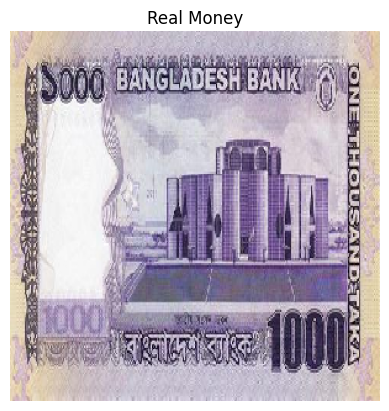

In [ ]:
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
import keras.utils as image

model1 = load_model('/content/drive/MyDrive/fcdVgg19.h5')
img_pred = image.load_img(r"/content/drive/MyDrive/1k.jpg", target_size=(300, 300))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)
img_pred = img_pred / 255.0

result = model1.predict(img_pred)
print(result)

if result[0][0] > result[0][1]:
    prediction = "Fake Money"
else:
    prediction = "Real Money"

print(prediction)

# Display the image
plt.imshow(img_pred[0])
plt.title(prediction)
plt.axis('off')
plt.show()